In [47]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv("scd-extended.csv")

# Display the first few rows
df.head(100)

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
0,1,0,4,3,20,88,2,3,2,114,...,13,40,139,387376,42,0,265,388388,97,Vaso-occlusive Crisis\n
1,2,1,3,12,47,11,10,3,35,130,...,16,40,134,209786,15,1,303,210760,53,Mild Pain
2,3,1,40,3,18,71,6,1,23,168,...,12,38,135,239317,51,1,335,240473,60,Vaso-occlusive Crisis\n
3,4,0,10,12,37,72,2,2,10,127,...,17,41,145,376564,37,1,327,377659,94,Vaso-occlusive Crisis\n
4,5,1,6,8,39,17,5,5,77,133,...,14,40,123,231031,44,0,331,232097,58,Vaso-occlusive Crisis\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,9,6,10,66,10,5,71,161,...,13,38,70,176160,3,0,301,177109,44,Mild Pain
96,97,1,6,11,12,25,7,3,73,150,...,12,41,109,193982,62,0,237,194952,49,Mild Pain
97,98,0,29,9,52,74,5,4,45,156,...,18,39,144,341695,53,1,260,342804,85,Vaso-occlusive Crisis\n
98,99,1,4,3,42,3,10,2,8,151,...,17,39,124,386562,17,1,394,387695,97,Vaso-occlusive Crisis\n


In [4]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)

Missing Values:
 S/N                                              0
 Gender (sex)                                    0
Age of patient                                   0
Age at diagnosis                                 0
Body Mass Index BMI                              0
Packet Cell Volume (PCV)                         0
Frequency of Anemia Crisis                       0
Frequency of Blood Transfusions                  0
Peripheral Capillary Oxygen Saturation (Spo2)    0
Systolic BP                                      0
Diastolic BP                                     0
Heart Rate (Pulse)                               0
Respiratory Rate (Resp)                          0
 Hb F                                            0
Temp                                             0
Mean corpuscular volume (MCV)                    0
Platelets (PLTS)                                 0
Alanine Aminotransferase (ALT) test              0
Bilirubin                                        0
Lactate Dehydr

In [5]:
# Display summary statistics of the dataset
df.describe()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Respiratory Rate (Resp),Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,40.836154,0.531538,20.516923,7.886154,36.121538,51.992308,5.555385,2.873077,51.482308,142.873846,...,19.626154,14.486154,39.423846,106.638462,279085.736923,32.430000,0.601538,306.333077,277529.272308,64.870000
std,25.784804,0.499196,11.498992,3.956183,15.497716,27.616642,2.649242,1.210697,28.163503,24.989656,...,5.758437,2.250438,1.114486,24.506493,72337.179533,18.194244,0.491339,72.034050,71398.884235,18.073007
min,0.000000,0.000000,1.000000,1.000000,10.000000,2.000000,1.000000,1.000000,2.000000,100.000000,...,10.000000,10.000000,37.000000,61.000000,150396.000000,1.000000,0.000000,180.000000,150780.000000,39.000000
25%,19.000000,0.000000,10.000000,5.000000,23.000000,29.000000,3.000000,2.000000,28.000000,121.750000,...,15.000000,13.000000,39.000000,86.000000,215995.500000,16.000000,0.000000,243.000000,216061.250000,49.000000
50%,39.500000,1.000000,20.000000,8.000000,36.000000,52.000000,6.000000,3.000000,52.000000,143.000000,...,20.000000,15.000000,39.000000,107.000000,279995.000000,33.000000,1.000000,307.000000,277882.000000,60.000000
75%,58.000000,1.000000,31.000000,11.000000,49.000000,75.000000,8.000000,4.000000,76.000000,166.000000,...,25.000000,16.000000,40.000000,127.000000,344666.750000,48.000000,1.000000,367.000000,339603.250000,81.000000
max,100.000000,1.000000,40.000000,15.000000,65.000000,100.000000,10.000000,5.000000,100.000000,188.000000,...,30.000000,19.000000,41.000000,150.000000,399702.000000,65.000000,2.000000,449.000000,400629.000000,100.000000


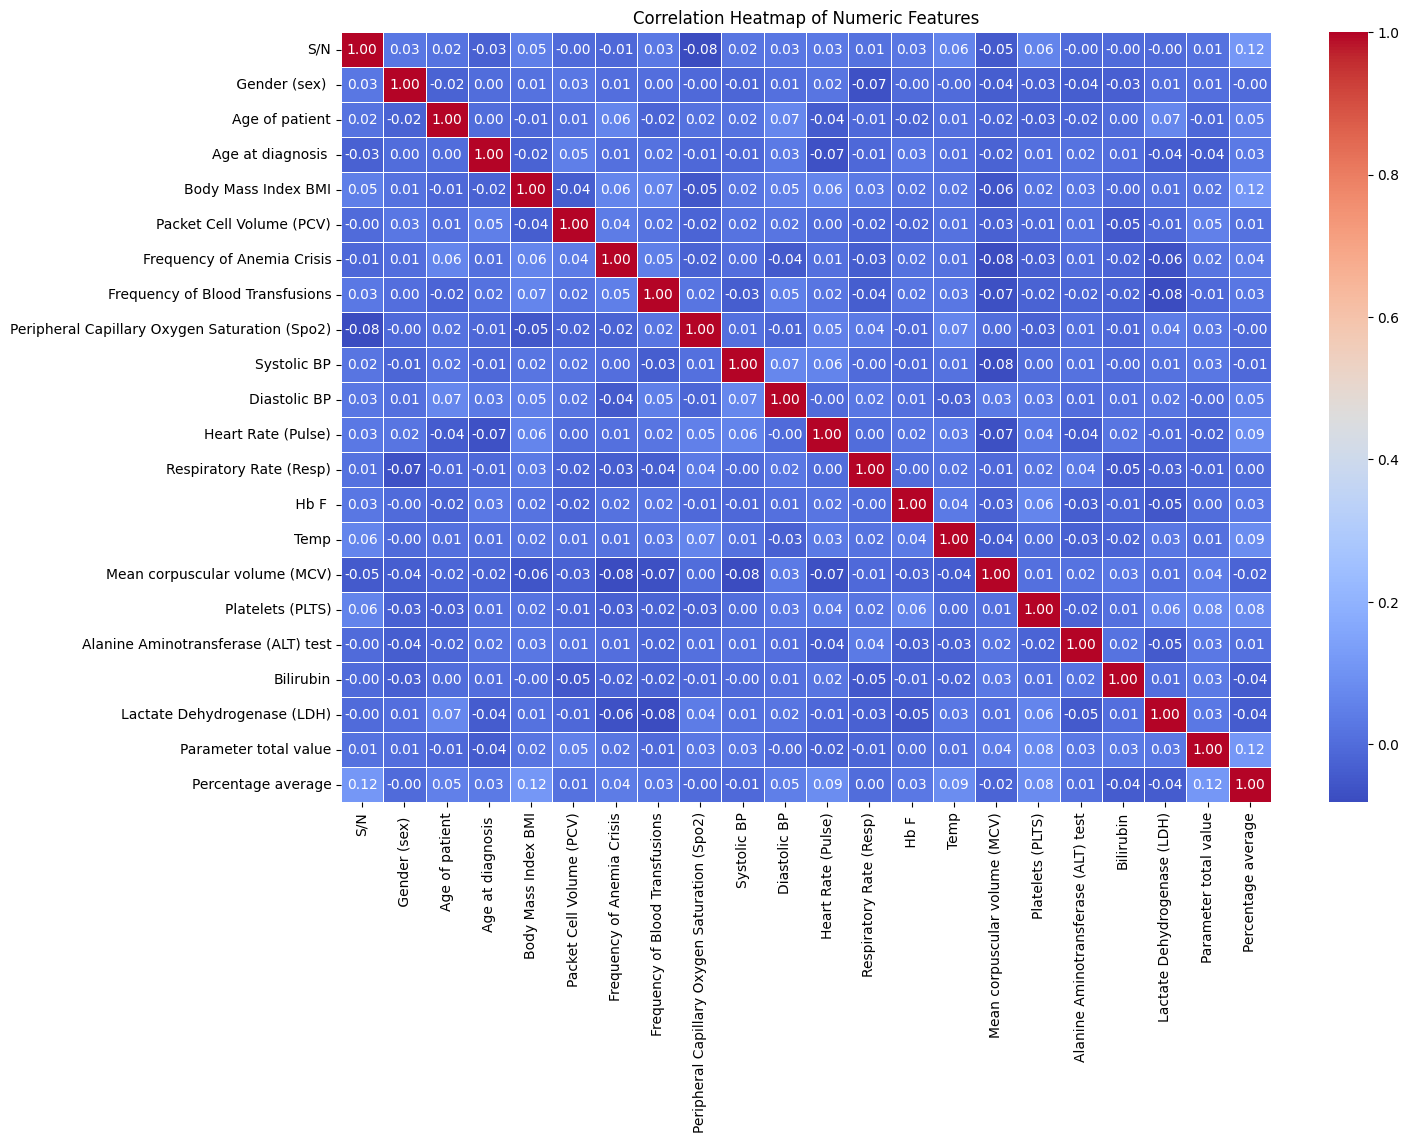

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [7]:
#Check existing columns\
#df.columns = df.columns.str.strip() #Trim whitespaces

print(df.columns)

Index(['S/N', ' Gender (sex) ', 'Age of patient', 'Age at diagnosis ',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       'Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)',
       ' Hb F ', 'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average', 'Pain Classification'],
      dtype='object')


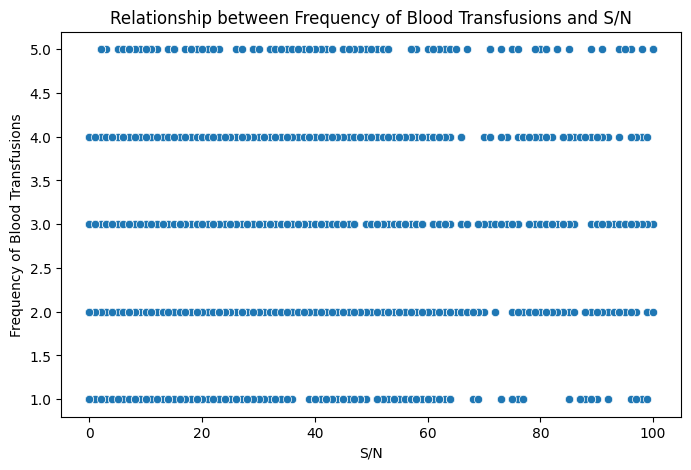

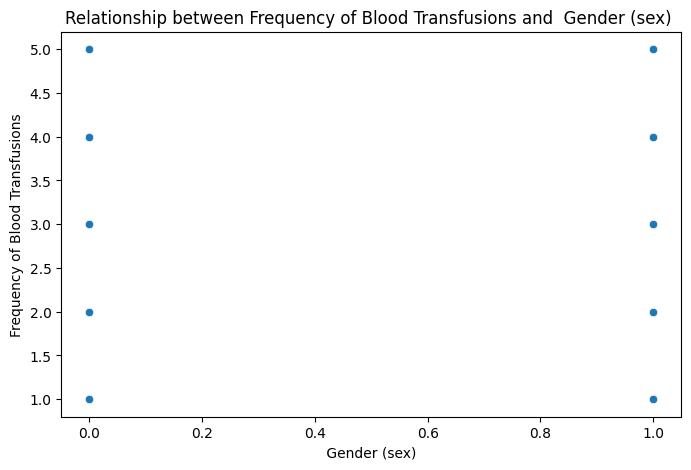

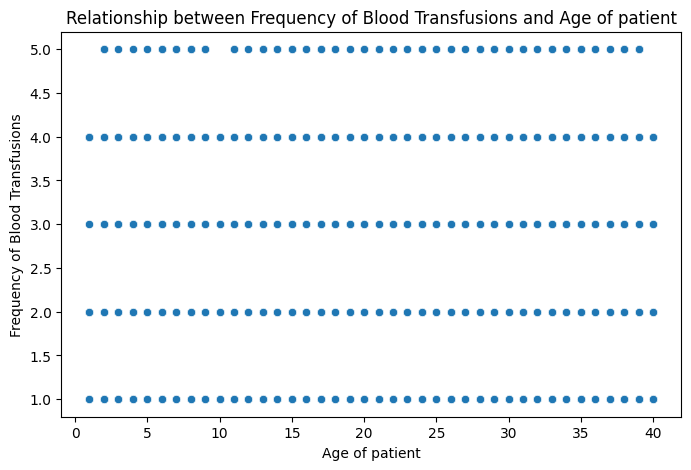

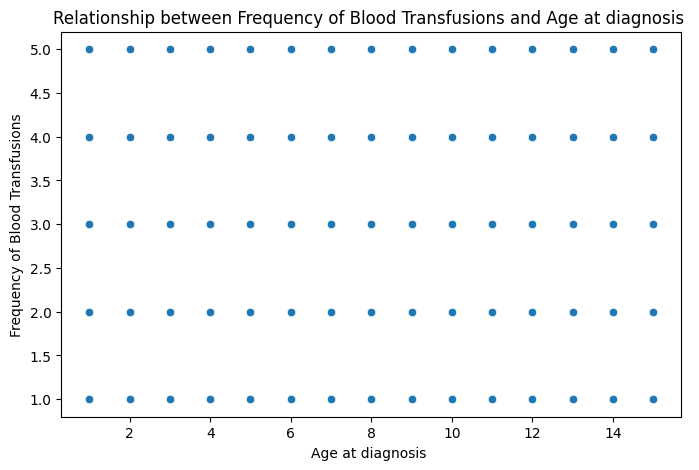

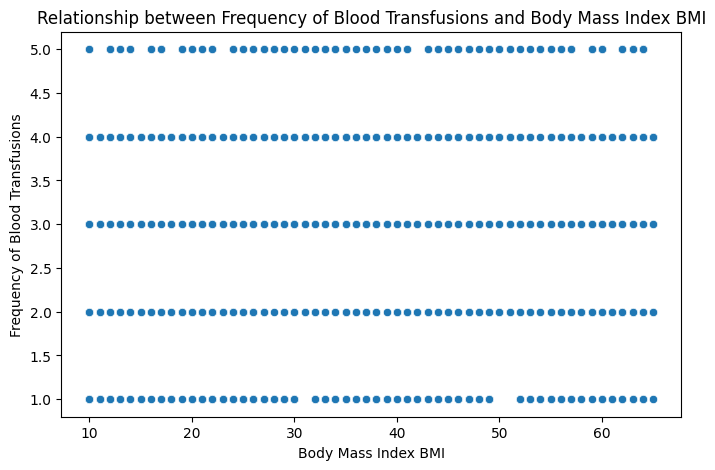

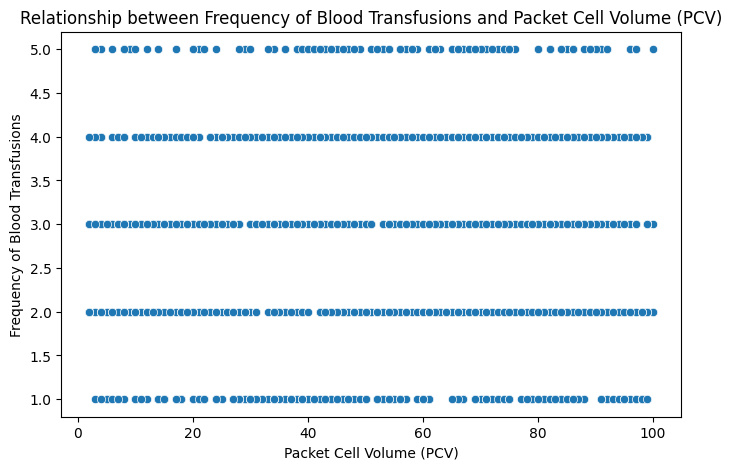

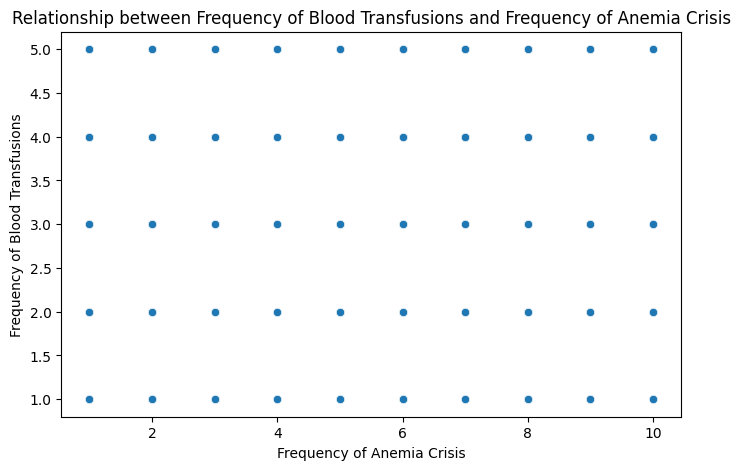

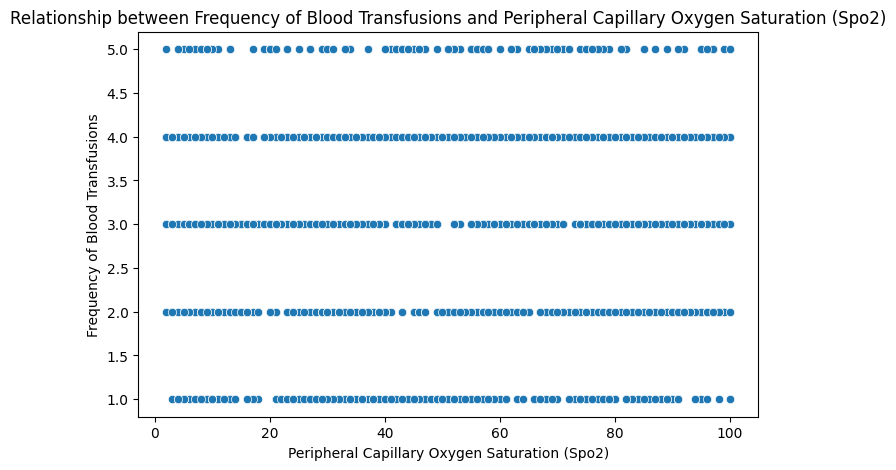

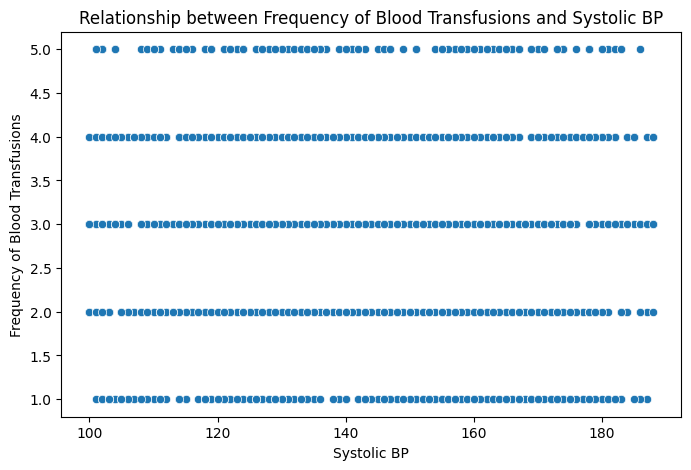

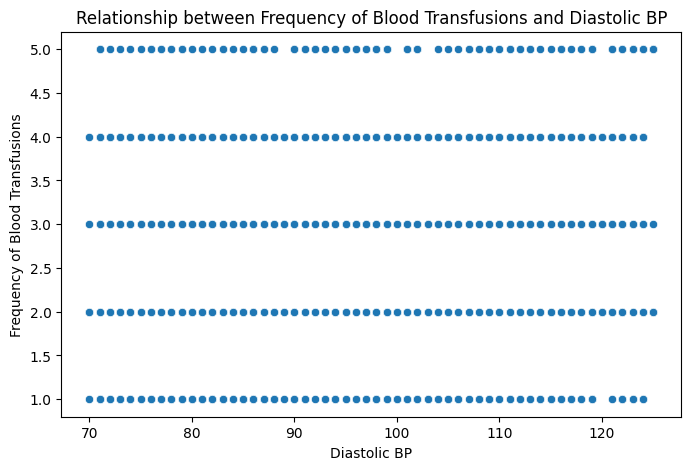

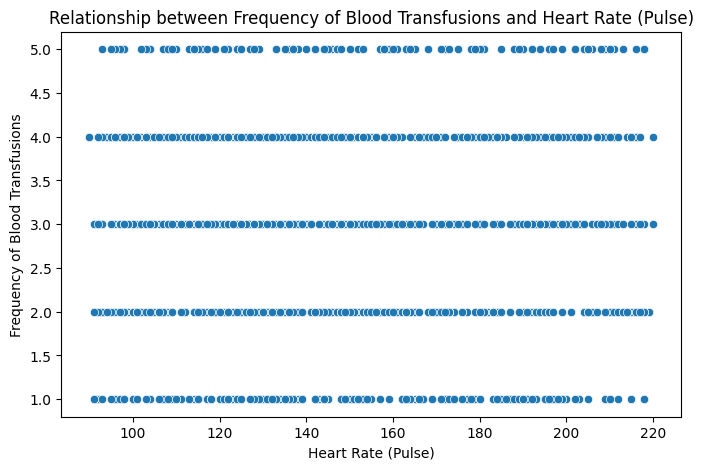

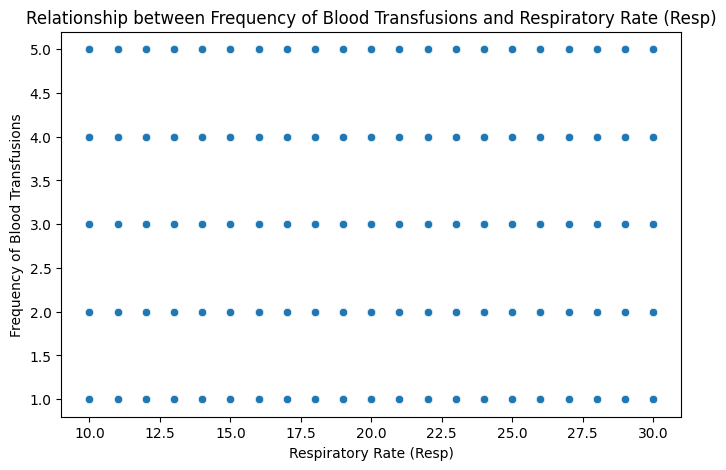

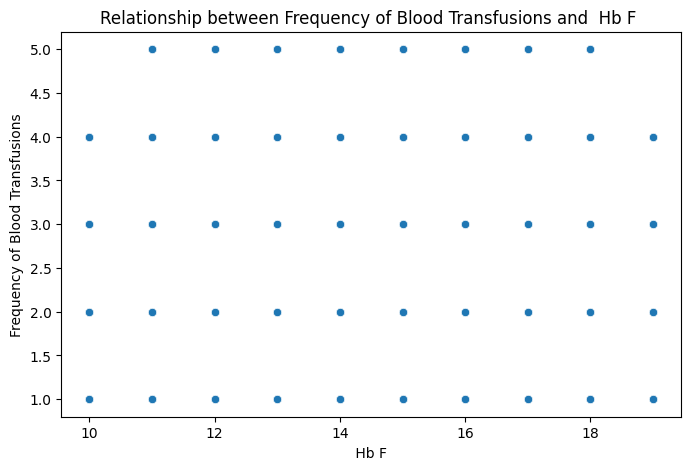

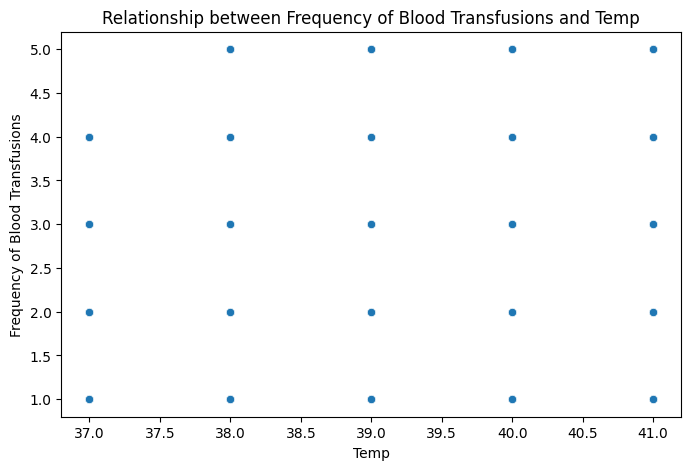

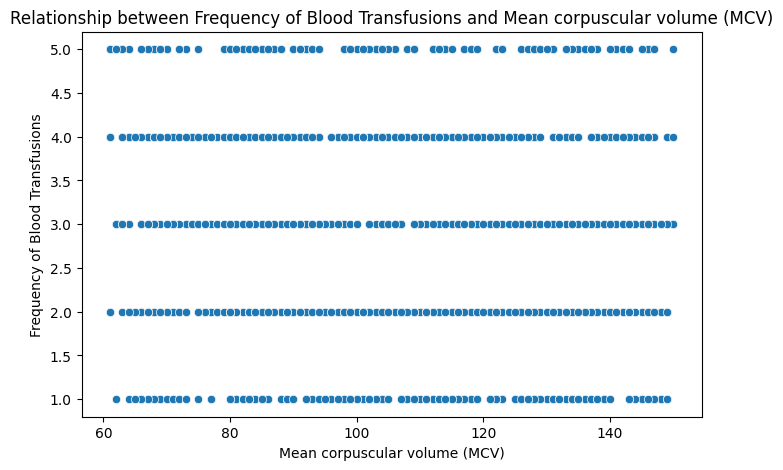

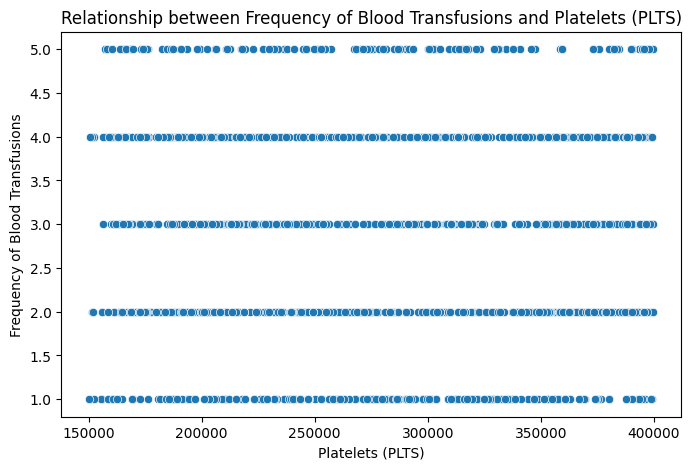

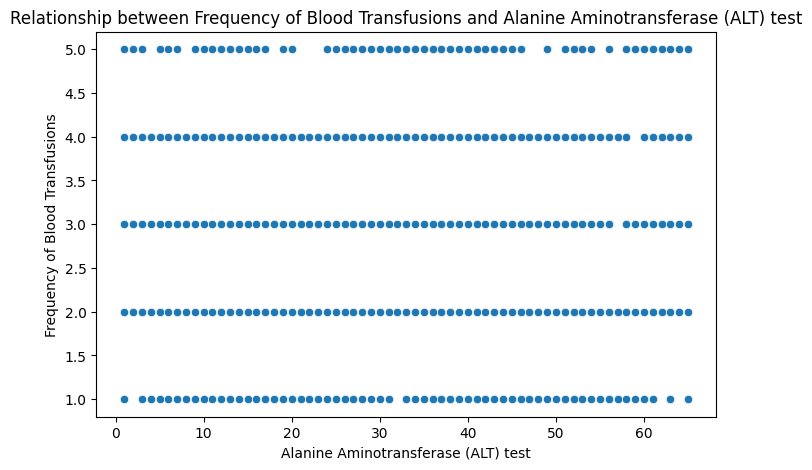

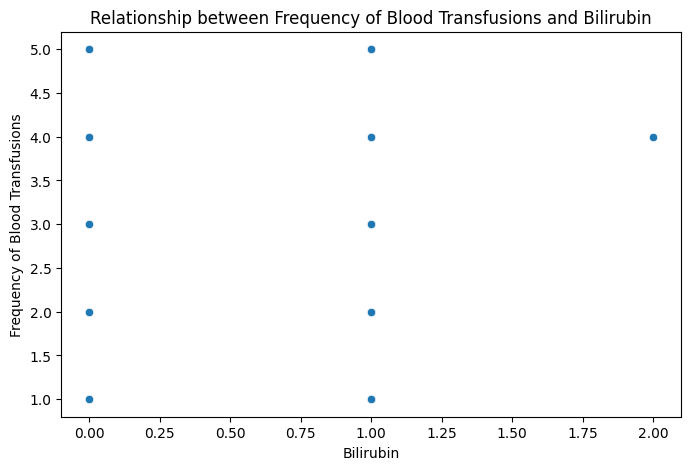

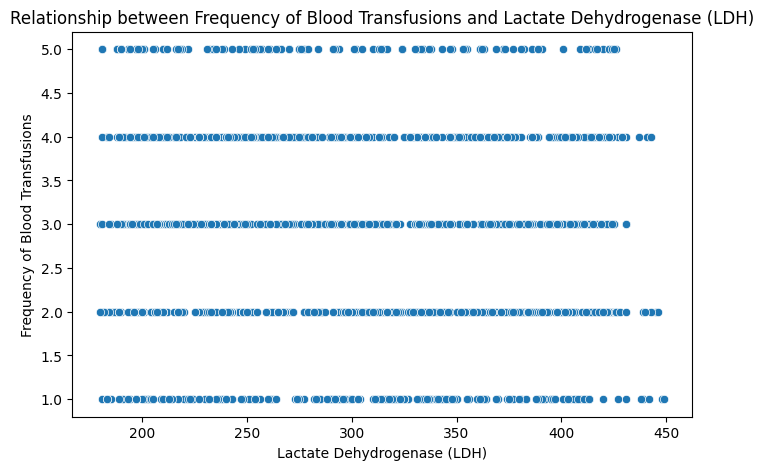

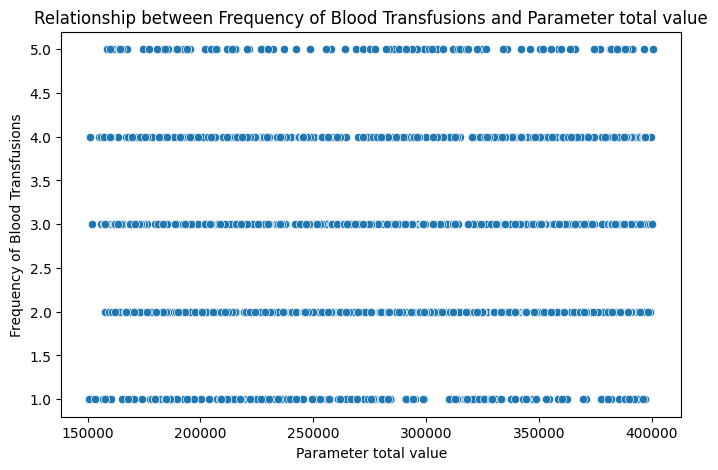

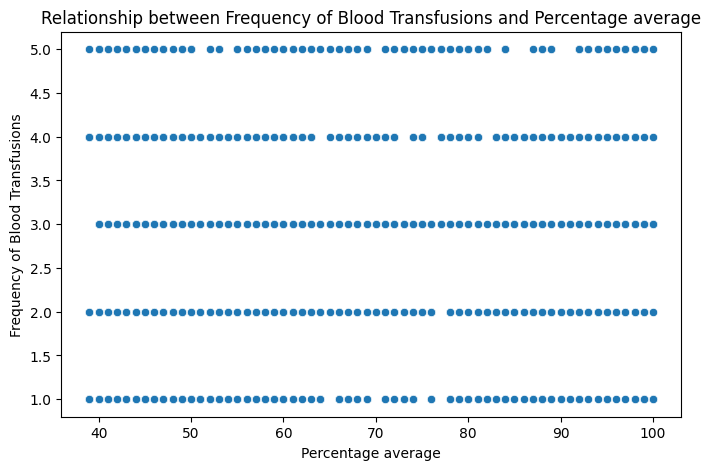

In [8]:
# List of numeric features to plot against the target variable
numeric_features = numeric_df.columns.drop("Frequency of Blood Transfusions")

# Create scatter plots
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df["Frequency of Blood Transfusions"])
    plt.title(f"Relationship between Frequency of Blood Transfusions and {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency of Blood Transfusions")
    plt.show()

<ipython-input-9-913c0b1cb5f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=' Gender (sex) ', palette='Set2')


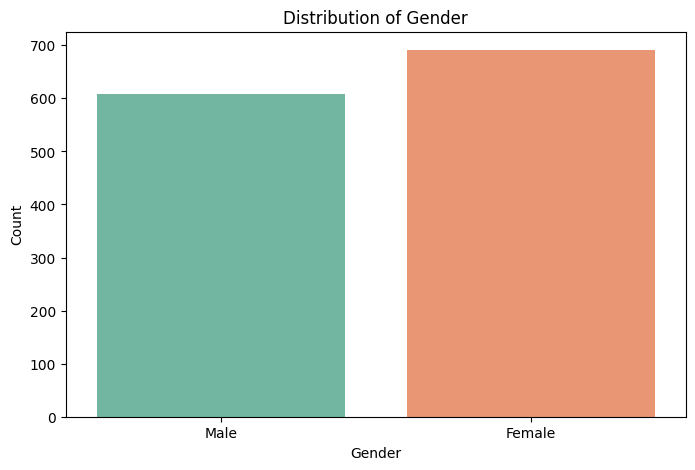

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=' Gender (sex) ', palette='Set2')
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-10-b115987c211a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=' Gender (sex) ', y='Age of patient', palette='Set2')


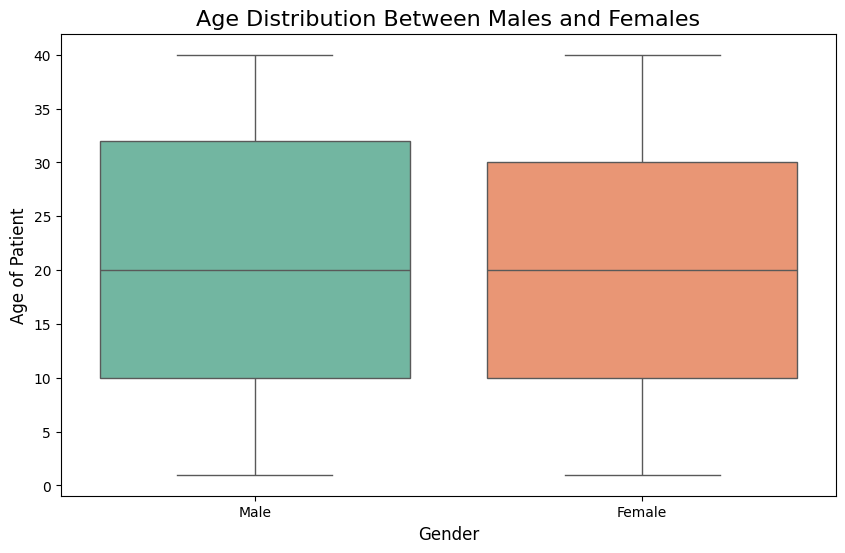

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Now plot the Age distribution by Gender
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of 'Age of patient' by gender
sns.boxplot(data=df, x=' Gender (sex) ', y='Age of patient', palette='Set2')

# Add titles and labels
plt.title('Age Distribution Between Males and Females', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age of Patient', fontsize=12)

# Customize x-ticks to show Male and Female for clarity
plt.xticks([0, 1], ['Male', 'Female'])

# Show the plot
plt.show()


<ipython-input-11-b115987c211a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=' Gender (sex) ', y='Age of patient', palette='Set2')


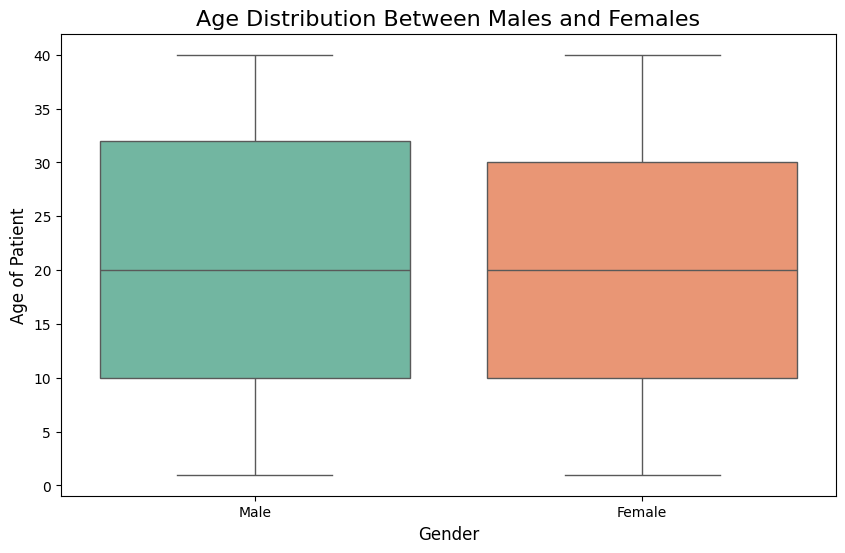

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Now plot the Age distribution by Gender
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of 'Age of patient' by gender
sns.boxplot(data=df, x=' Gender (sex) ', y='Age of patient', palette='Set2')

# Add titles and labels
plt.title('Age Distribution Between Males and Females', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age of Patient', fontsize=12)

# Customize x-ticks to show Male and Female for clarity
plt.xticks([0, 1], ['Male', 'Female'])

# Show the plot
plt.show()

In [12]:
# Map the values to integers
df["Pain Classification"] = df["Pain Classification"].replace({
    "Vaso-occlusive Crisis\n": 0,
    "Mild Pain": 1
})

# Verify the conversion
print(df["Pain Classification"].value_counts())

Pain Classification
0    733
1    567
Name: count, dtype: int64


<ipython-input-12-1f1061dbc5b1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Pain Classification"] = df["Pain Classification"].replace({


In [13]:
#Check existing columns
print(df.columns)


Index(['S/N', ' Gender (sex) ', 'Age of patient', 'Age at diagnosis ',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       'Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)',
       ' Hb F ', 'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average', 'Pain Classification'],
      dtype='object')


In [14]:
#remove white spaces
df.columns = df.columns.str.strip()


In [15]:
# Verify column name '
df["Pain Classification"] = df["Pain Classification"].replace({
    "Vaso-occlusive Crisis": 0,
    "Mild Pain": 1
})

In [16]:
# Display the first few rows
df.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
0,1,0,4,3,20,88,2,3,2,114,...,13,40,139,387376,42,0,265,388388,97,0
1,2,1,3,12,47,11,10,3,35,130,...,16,40,134,209786,15,1,303,210760,53,1
2,3,1,40,3,18,71,6,1,23,168,...,12,38,135,239317,51,1,335,240473,60,0
3,4,0,10,12,37,72,2,2,10,127,...,17,41,145,376564,37,1,327,377659,94,0
4,5,1,6,8,39,17,5,5,77,133,...,14,40,123,231031,44,0,331,232097,58,0


In [17]:
# Summary statistics of relationship between FOBT and Pain Classification
summary = df.groupby("Pain Classification")["Frequency of Blood Transfusions"].describe()
print(summary)

                     count      mean      std  min  25%  50%  75%  max
Pain Classification                                                   
0                    733.0  2.912688  1.24049  1.0  2.0  3.0  4.0  5.0
1                    567.0  2.821869  1.17016  1.0  2.0  3.0  4.0  5.0


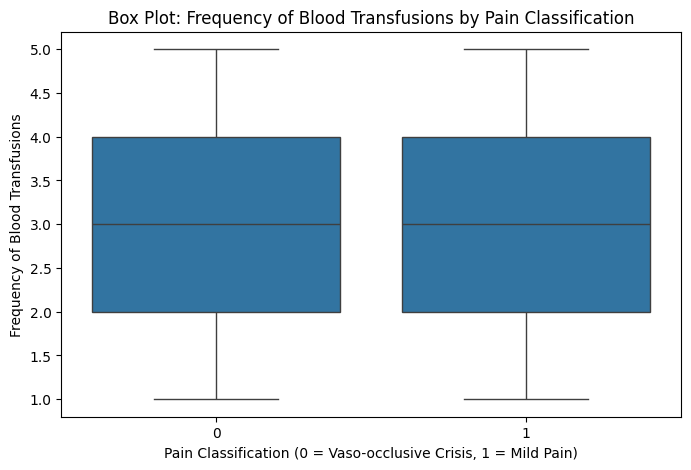

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Pain Classification", y="Frequency of Blood Transfusions", data=df)
plt.title("Box Plot: Frequency of Blood Transfusions by Pain Classification")
plt.xlabel("Pain Classification (0 = Vaso-occlusive Crisis, 1 = Mild Pain)")
plt.ylabel("Frequency of Blood Transfusions")
plt.show()

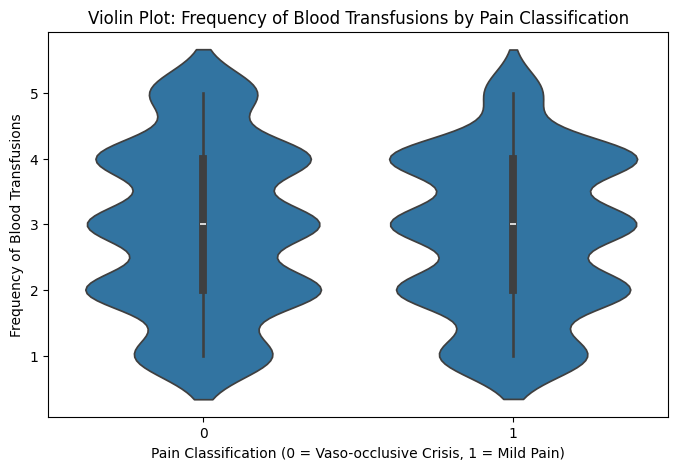

In [19]:
# Create a violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x="Pain Classification", y="Frequency of Blood Transfusions", data=df)
plt.title("Violin Plot: Frequency of Blood Transfusions by Pain Classification")
plt.xlabel("Pain Classification (0 = Vaso-occlusive Crisis, 1 = Mild Pain)")
plt.ylabel("Frequency of Blood Transfusions")
plt.show()

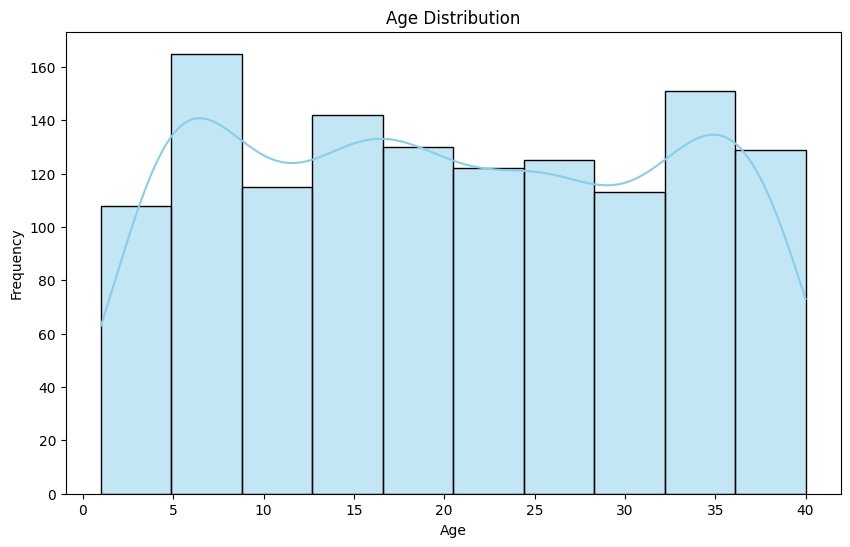

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age of patient'], kde=True, bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


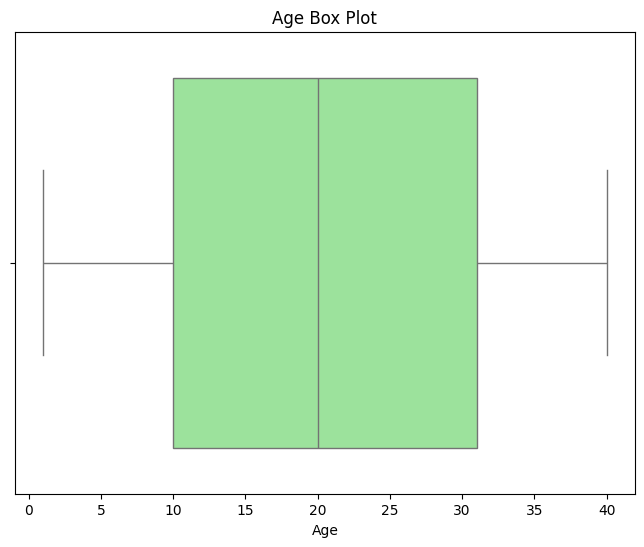

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age of patient'], color='lightgreen')
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.show()

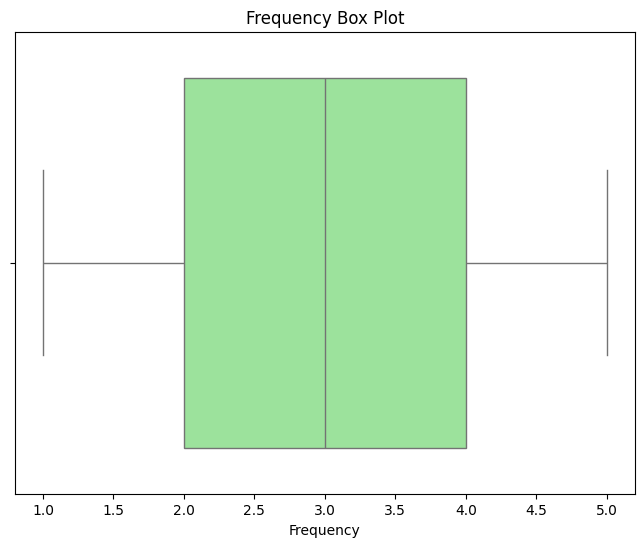

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Frequency of Blood Transfusions'], color='lightgreen')
plt.title('Frequency Box Plot')
plt.xlabel('Frequency')
plt.show()

In [22]:
# Define the bins and labels for age groups
bins = [0, 10, 20, 30, 40, float('inf')]  # Inf for ages greater than 40
labels = ['0-10', '10-20', '20-30', '30-40', '>40']

# Create a new column 'age_group' that categorizes each age
df['Patient_age_groups'] = pd.cut(df['Age of patient'], bins=bins, labels=labels, right=False)

In [23]:
#Check existing columns
print(df.columns)

Index(['S/N', 'Gender (sex)', 'Age of patient', 'Age at diagnosis',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       'Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)', 'Hb F',
       'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average', 'Pain Classification', 'Patient_age_groups'],
      dtype='object')


In [24]:
# Display the first few rows
df.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification,Patient_age_groups
0,1,0,4,3,20,88,2,3,2,114,...,40,139,387376,42,0,265,388388,97,0,0-10
1,2,1,3,12,47,11,10,3,35,130,...,40,134,209786,15,1,303,210760,53,1,0-10
2,3,1,40,3,18,71,6,1,23,168,...,38,135,239317,51,1,335,240473,60,0,>40
3,4,0,10,12,37,72,2,2,10,127,...,41,145,376564,37,1,327,377659,94,0,10-20
4,5,1,6,8,39,17,5,5,77,133,...,40,123,231031,44,0,331,232097,58,0,0-10


In [25]:
# Define the bins and integer labels for the age groups
bins = [0, 10, 20, 30, 40, float('inf')]  # Inf for ages greater than 40
labels = [1, 2, 3, 4, 5]  # Integer labels for the corresponding age groups

# Create a new column 'age_group' that categorizes each age into an integer class
df['Patient_Num_age_groupS'] = pd.cut(df['Age of patient'], bins=bins, labels=labels, right=False)

In [26]:
# Display the first few rows
df.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification,Patient_age_groups,Patient_Num_age_groupS
0,1,0,4,3,20,88,2,3,2,114,...,139,387376,42,0,265,388388,97,0,0-10,1
1,2,1,3,12,47,11,10,3,35,130,...,134,209786,15,1,303,210760,53,1,0-10,1
2,3,1,40,3,18,71,6,1,23,168,...,135,239317,51,1,335,240473,60,0,>40,5
3,4,0,10,12,37,72,2,2,10,127,...,145,376564,37,1,327,377659,94,0,10-20,2
4,5,1,6,8,39,17,5,5,77,133,...,123,231031,44,0,331,232097,58,0,0-10,1


<ipython-input-27-b627da244ef7>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Patient_Num_age_groupS', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')


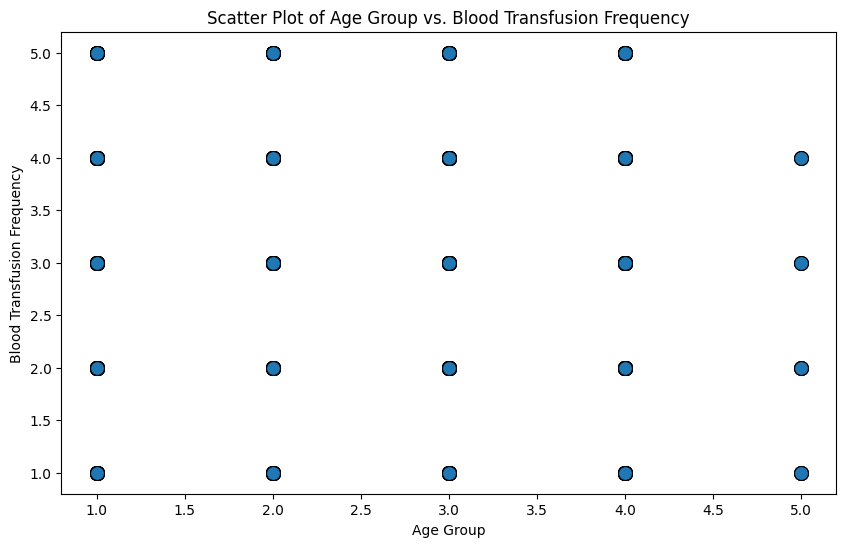

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Patient_Num_age_groupS', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')
plt.title('Scatter Plot of Age Group vs. Blood Transfusion Frequency')
plt.xlabel('Age Group')
plt.ylabel('Blood Transfusion Frequency')
plt.show()

In [28]:
# Categorize BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply categorization function
df['BMI_Category'] = df['Body Mass Index BMI'].apply(categorize_bmi)

# Create a mapping dictionary to convert BMI categories to numeric values
category_mapping = {
    'Underweight': -1,
    'Normal': 0,
    'Overweight': 2,
    'Obese': 3
}

# Convert the 'BMI_Category' to numeric values using the mapping
df['BMI_Category_Numeric'] = df['BMI_Category'].map(category_mapping)

# Display the categorized BMI
df.head()


,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification,Patient_age_groups,Patient_Num_age_groupS,BMI_Category,BMI_Category_Numeric
0,1,0,4,3,20,88,2,3,2,114,...,42,0,265,388388,97,0,0-10,1,Normal,0
1,2,1,3,12,47,11,10,3,35,130,...,15,1,303,210760,53,1,0-10,1,Obese,3
2,3,1,40,3,18,71,6,1,23,168,...,51,1,335,240473,60,0,>40,5,Underweight,-1
3,4,0,10,12,37,72,2,2,10,127,...,37,1,327,377659,94,0,10-20,2,Obese,3
4,5,1,6,8,39,17,5,5,77,133,...,44,0,331,232097,58,0,0-10,1,Obese,3


<ipython-input-29-d1c957e14b69>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender (sex)', palette='Set2')


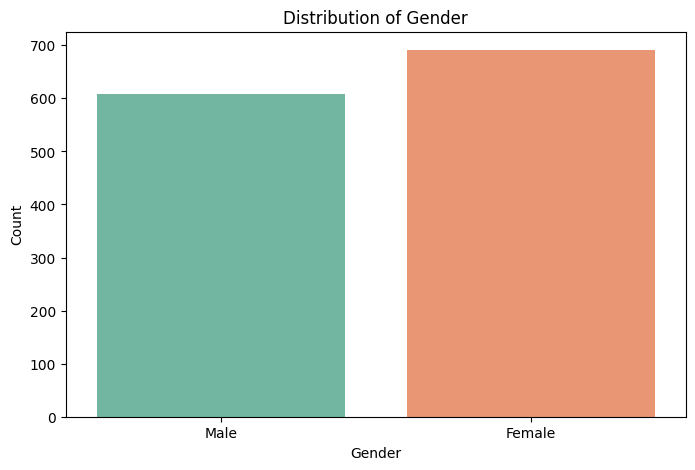

<ipython-input-29-d1c957e14b69>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='BMI_Category_Label', palette='Set1')


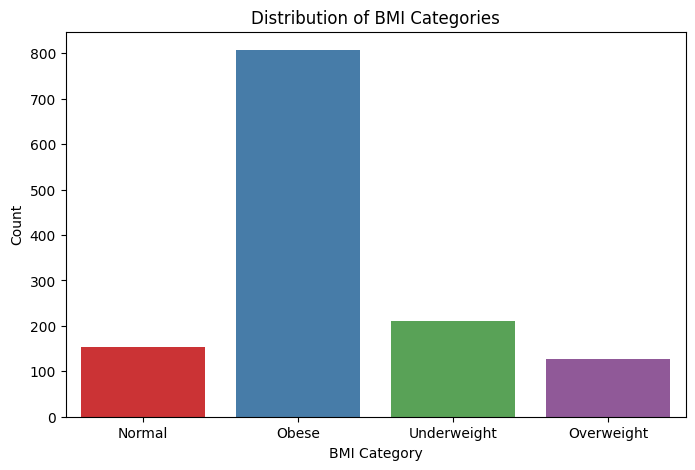

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df and it contains 'Gender' and 'BMI' columns
# First, let's visualize the distribution of Gender (0 - Male, 1 - Female)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender (sex)', palette='Set2')
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Now, let's visualize the distribution of BMI Categories
# For this, we will map the BMI codes (-1, 0, 2, 3) to their respective categories

# Create a mapping dictionary for BMI categories
bmi_mapping = {-1: 'Underweight', 0: 'Normal', 2: 'Overweight', 3: 'Obese'}

# Apply this mapping to the 'BMI' column
df['BMI_Category_Label'] = df['BMI_Category_Numeric'].map(bmi_mapping)

# Plot the distribution of BMI categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='BMI_Category_Label', palette='Set1')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


<ipython-input-30-917a161ac240>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='BMI_Category_Numeric', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')


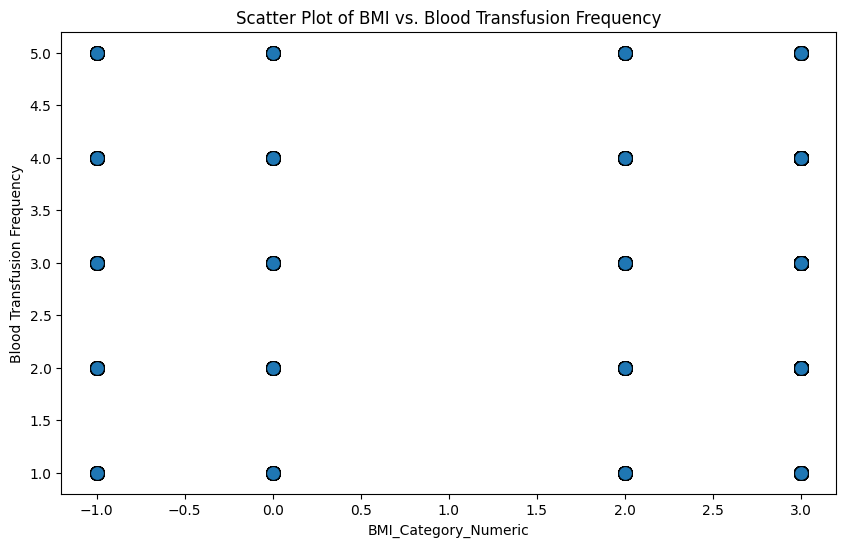

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI_Category_Numeric', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')
plt.title('Scatter Plot of BMI vs. Blood Transfusion Frequency')
plt.xlabel('BMI_Category_Numeric')
plt.ylabel('Blood Transfusion Frequency')
plt.show()

Anemia_Crisis_Ratio:
This ratio essentially quantifies how often a patient experiences anemia crises relative to their age.

In [31]:
# Calculate the Anemia Crisis Ratio (Frequency of Anemia Crisis / Age)
df['Anemia_Crisis_Ratio'] = df['Frequency of Anemia Crisis'] / df['Age of patient']

# Display the DataFrame with the new column
print(df[['Age of patient', 'Frequency of Anemia Crisis', 'Anemia_Crisis_Ratio']].head())

   Age of patient  Frequency of Anemia Crisis  Anemia_Crisis_Ratio
0               4                           2             0.500000
1               3                          10             3.333333
2              40                           6             0.150000
3              10                           2             0.200000
4               6                           5             0.833333


<ipython-input-32-92dae9eeffb6>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Anemia_Crisis_Ratio', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')


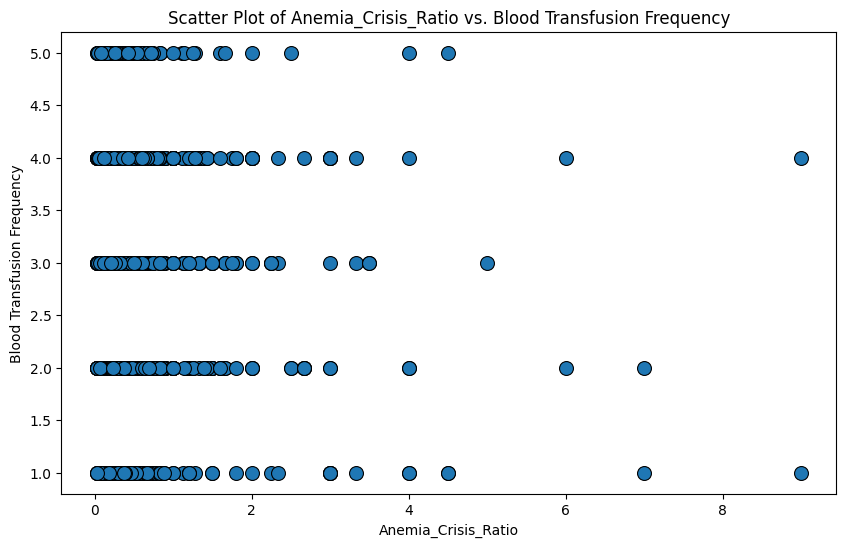

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anemia_Crisis_Ratio', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')
plt.title('Scatter Plot of Anemia_Crisis_Ratio vs. Blood Transfusion Frequency')
plt.xlabel('Anemia_Crisis_Ratio')
plt.ylabel('Blood Transfusion Frequency')
plt.show()

In [33]:
# Calculate the  Ratio of Packet Cell Volume (PCV) to Hb F
df['PCV_HbF_Ratio'] = df['Packet Cell Volume (PCV)'] / df['Hb F']

# Display the DataFrame with the new column
print(df[['Hb F', 'Packet Cell Volume (PCV)', 'PCV_HbF_Ratio']].head())

   Hb F  Packet Cell Volume (PCV)  PCV_HbF_Ratio
0    13                        88       6.769231
1    16                        11       0.687500
2    12                        71       5.916667
3    17                        72       4.235294
4    14                        17       1.214286


<ipython-input-34-6dfe08ed2d08>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCV_HbF_Ratio', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')


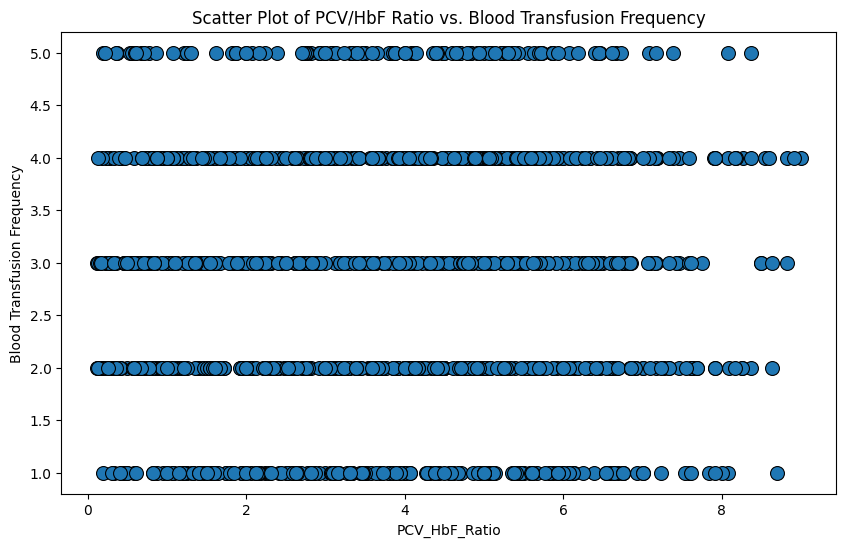

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCV_HbF_Ratio', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')
plt.title('Scatter Plot of PCV/HbF Ratio vs. Blood Transfusion Frequency')
plt.xlabel('PCV_HbF_Ratio')
plt.ylabel('Blood Transfusion Frequency')
plt.show()

In [35]:
df.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Parameter total value,Percentage average,Pain Classification,Patient_age_groups,Patient_Num_age_groupS,BMI_Category,BMI_Category_Numeric,BMI_Category_Label,Anemia_Crisis_Ratio,PCV_HbF_Ratio
0,1,0,4,3,20,88,2,3,2,114,...,388388,97,0,0-10,1,Normal,0,Normal,0.500000,6.769231
1,2,1,3,12,47,11,10,3,35,130,...,210760,53,1,0-10,1,Obese,3,Obese,3.333333,0.687500
2,3,1,40,3,18,71,6,1,23,168,...,240473,60,0,>40,5,Underweight,-1,Underweight,0.150000,5.916667
3,4,0,10,12,37,72,2,2,10,127,...,377659,94,0,10-20,2,Obese,3,Obese,0.200000,4.235294
4,5,1,6,8,39,17,5,5,77,133,...,232097,58,0,0-10,1,Obese,3,Obese,0.833333,1.214286


In [36]:
# Calculate the  Vital Signs Aggregate Score:
df['Vital_Signs_Score'] = df['Systolic BP'] + df['Diastolic BP'] + df['Heart Rate (Pulse)'] + df['Respiratory Rate (Resp)'] - df['Peripheral Capillary Oxygen Saturation (Spo2)']

# Display the DataFrame with the new column
print(df[['Systolic BP', 'Diastolic BP','Heart Rate (Pulse)','Respiratory Rate (Resp)','Peripheral Capillary Oxygen Saturation (Spo2)', 'Vital_Signs_Score']].head())

   Systolic BP  Diastolic BP  Heart Rate (Pulse)  Respiratory Rate (Resp)  \
0          114           107                 156                       21   
1          130            87                 127                       15   
2          168           100                 185                       12   
3          127           122                 129                       26   
4          133            81                 140                       17   

   Peripheral Capillary Oxygen Saturation (Spo2)  Vital_Signs_Score  
0                                              2                396  
1                                             35                324  
2                                             23                442  
3                                             10                394  
4                                             77                294  


<ipython-input-37-2acdbbfec595>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Vital_Signs_Score', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')


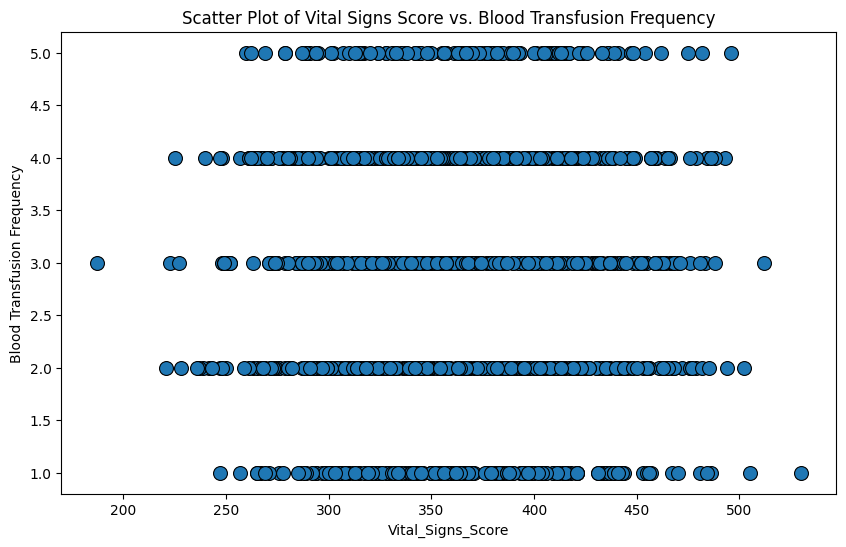

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vital_Signs_Score', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')
plt.title('Scatter Plot of Vital Signs Score vs. Blood Transfusion Frequency')
plt.xlabel('Vital_Signs_Score')
plt.ylabel('Blood Transfusion Frequency')
plt.show()

In [38]:
# Calculate the  Ratio of LDH/ALT
df['LDH_ALT_Ratio'] = df['Lactate Dehydrogenase (LDH)'] / df['Alanine Aminotransferase (ALT) test']

# Display the DataFrame with the new column
print(df[['Alanine Aminotransferase (ALT) test', 'Lactate Dehydrogenase (LDH)', 'LDH_ALT_Ratio']].head())

   Alanine Aminotransferase (ALT) test  Lactate Dehydrogenase (LDH)  \
0                                   42                          265   
1                                   15                          303   
2                                   51                          335   
3                                   37                          327   
4                                   44                          331   

   LDH_ALT_Ratio  
0       6.309524  
1      20.200000  
2       6.568627  
3       8.837838  
4       7.522727  


<ipython-input-39-131f79eb2a02>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='LDH_ALT_Ratio', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')


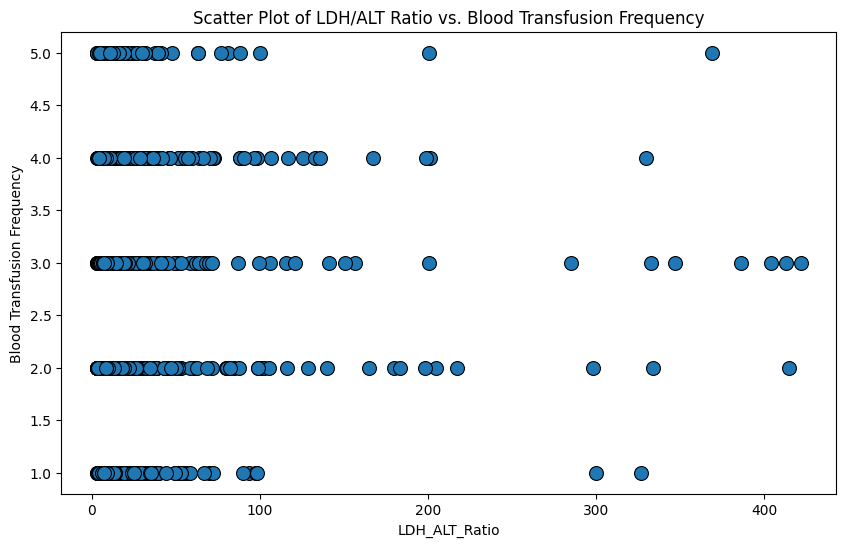

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LDH_ALT_Ratio', y='Frequency of Blood Transfusions', data=df, palette='Set1', s=100, edgecolor='black')
plt.title('Scatter Plot of LDH/ALT Ratio vs. Blood Transfusion Frequency')
plt.xlabel('LDH_ALT_Ratio')
plt.ylabel('Blood Transfusion Frequency')
plt.show()

In [40]:
df.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Pain Classification,Patient_age_groups,Patient_Num_age_groupS,BMI_Category,BMI_Category_Numeric,BMI_Category_Label,Anemia_Crisis_Ratio,PCV_HbF_Ratio,Vital_Signs_Score,LDH_ALT_Ratio
0,1,0,4,3,20,88,2,3,2,114,...,0,0-10,1,Normal,0,Normal,0.500000,6.769231,396,6.309524
1,2,1,3,12,47,11,10,3,35,130,...,1,0-10,1,Obese,3,Obese,3.333333,0.687500,324,20.200000
2,3,1,40,3,18,71,6,1,23,168,...,0,>40,5,Underweight,-1,Underweight,0.150000,5.916667,442,6.568627
3,4,0,10,12,37,72,2,2,10,127,...,0,10-20,2,Obese,3,Obese,0.200000,4.235294,394,8.837838
4,5,1,6,8,39,17,5,5,77,133,...,0,0-10,1,Obese,3,Obese,0.833333,1.214286,294,7.522727


In [41]:
new_data = df.copy()
new_data.columns

Index(['S/N', 'Gender (sex)', 'Age of patient', 'Age at diagnosis',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       'Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)', 'Hb F',
       'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average', 'Pain Classification', 'Patient_age_groups',
       'Patient_Num_age_groupS', 'BMI_Category', 'BMI_Category_Numeric',
       'BMI_Category_Label', 'Anemia_Crisis_Ratio', 'PCV_HbF_Ratio',
       'Vital_Signs_Score', 'LDH_ALT_Ratio'],
      dtype='object')

In [42]:
data = new_data[['Pain Classification','Frequency of Blood Transfusions', 'Patient_Num_age_groupS', 'BMI_Category_Numeric','PCV_HbF_Ratio','Vital_Signs_Score','LDH_ALT_Ratio']]

In [43]:
y = data['Frequency of Blood Transfusions']


In [44]:
X = data.drop(['Frequency of Blood Transfusions'], axis=1)

In [48]:
model = LinearRegression()
model.fit(X, y)

print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')
print(f'RMSE: {mean_squared_error(y, model.predict(X))**0.5}')

Coefficient: -0.08685077252651767
Intercept: 2.9611507433224222
R-squared: 0.004212578819866364
RMSE: 1.2076794974728868


Orginala data

In [49]:
# Load the dataset
dataframe = pd.read_csv("scd-extended.csv")

# Display the first few rows
dataframe.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
0,1,0,4,3,20,88,2,3,2,114,...,13,40,139,387376,42,0,265,388388,97,Vaso-occlusive Crisis\n
1,2,1,3,12,47,11,10,3,35,130,...,16,40,134,209786,15,1,303,210760,53,Mild Pain
2,3,1,40,3,18,71,6,1,23,168,...,12,38,135,239317,51,1,335,240473,60,Vaso-occlusive Crisis\n
3,4,0,10,12,37,72,2,2,10,127,...,17,41,145,376564,37,1,327,377659,94,Vaso-occlusive Crisis\n
4,5,1,6,8,39,17,5,5,77,133,...,14,40,123,231031,44,0,331,232097,58,Vaso-occlusive Crisis\n


In [50]:
# Map the values to integers
dataframe["Pain Classification"] = dataframe["Pain Classification"].replace({
    "Vaso-occlusive Crisis\n": 0,
    "Mild Pain": 1
})

# Verify the conversion
print(df["Pain Classification"].value_counts())

Pain Classification
0    733
1    567
Name: count, dtype: int64


<ipython-input-50-c3ab082d03e9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe["Pain Classification"] = dataframe["Pain Classification"].replace({


In [51]:
dataframe.head()
dataframe.drop('S/N', axis=1, inplace=True)

Here, Using

In [52]:
y = dataframe['Frequency of Blood Transfusions']


In [53]:
X = dataframe.drop(['Frequency of Blood Transfusions'], axis=1)

In [54]:
model = LinearRegression()
model.fit(X, y)

print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')
print(f'RMSE: {mean_squared_error(y, model.predict(X))**0.5}')

Coefficient: -0.013890885839647345
Intercept: 2.6787882034021195
R-squared: 0.026978651620508387
RMSE: 1.1937944621318175


In [55]:
data

,Pain Classification,Frequency of Blood Transfusions,Patient_Num_age_groupS,BMI_Category_Numeric,PCV_HbF_Ratio,Vital_Signs_Score,LDH_ALT_Ratio
0,0,3,1,0,6.769231,396,6.309524
1,1,3,1,3,0.687500,324,20.200000
2,0,1,5,-1,5.916667,442,6.568627
3,0,2,2,3,4.235294,394,8.837838
4,0,5,1,3,1.214286,294,7.522727
...,...,...,...,...,...,...,...
1295,1,2,2,3,4.909091,318,8.225000
1296,1,3,4,2,2.500000,290,8.961538
1297,1,1,4,-1,3.727273,362,6.960000
1298,1,4,1,0,1.666667,391,4.075472


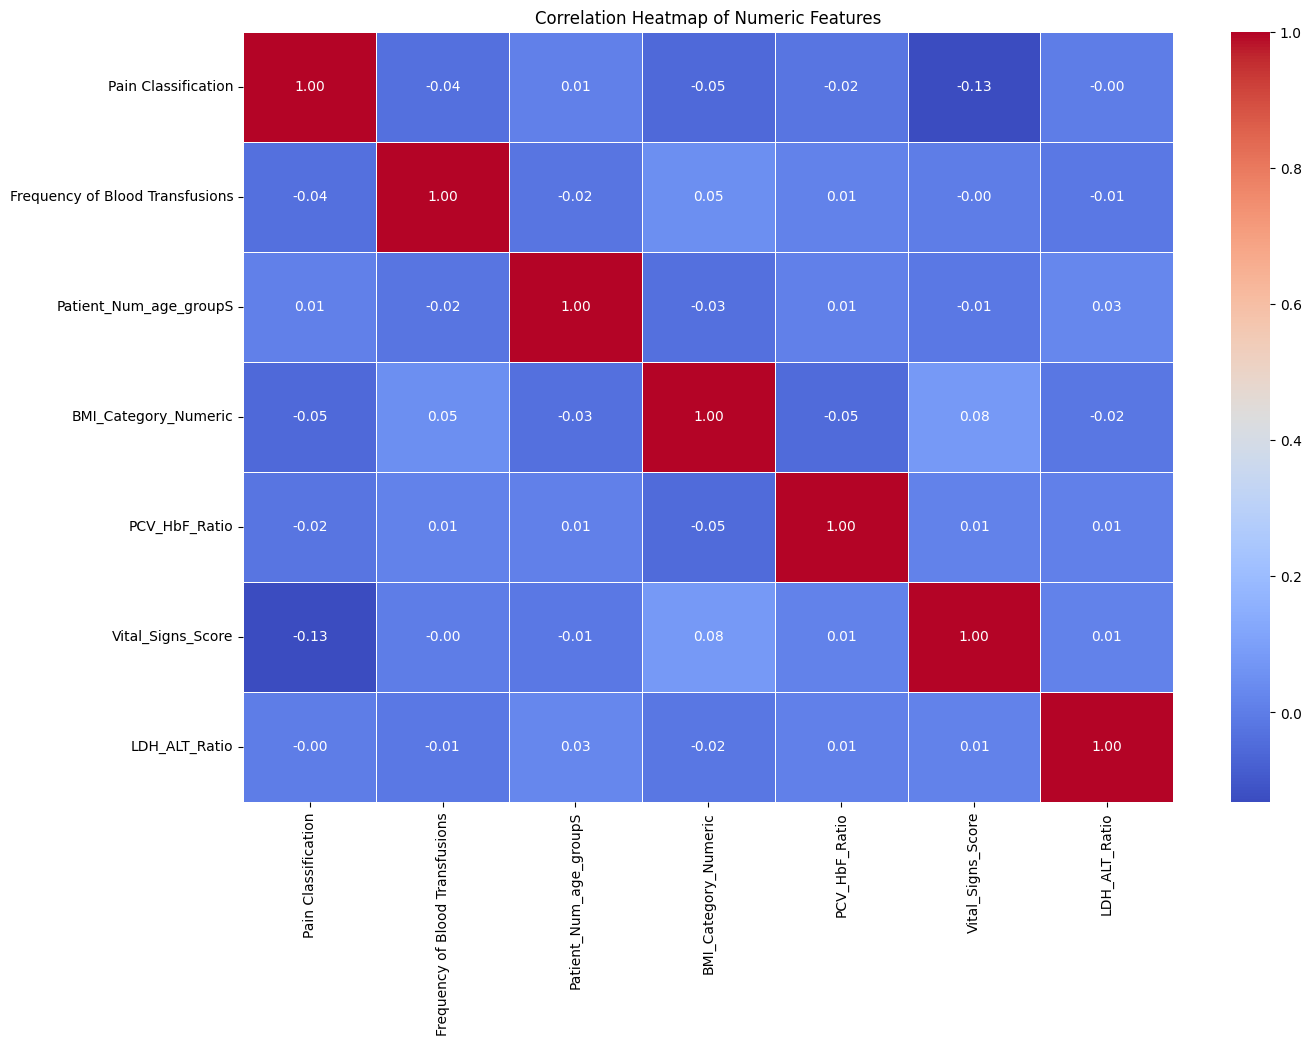

In [56]:
# Select only numeric columns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [57]:
# Pain Classification
# PCV_HBF_Ratio
# BMI_Category_Numeric

data


,Pain Classification,Frequency of Blood Transfusions,Patient_Num_age_groupS,BMI_Category_Numeric,PCV_HbF_Ratio,Vital_Signs_Score,LDH_ALT_Ratio
0,0,3,1,0,6.769231,396,6.309524
1,1,3,1,3,0.687500,324,20.200000
2,0,1,5,-1,5.916667,442,6.568627
3,0,2,2,3,4.235294,394,8.837838
4,0,5,1,3,1.214286,294,7.522727
...,...,...,...,...,...,...,...
1295,1,2,2,3,4.909091,318,8.225000
1296,1,3,4,2,2.500000,290,8.961538
1297,1,1,4,-1,3.727273,362,6.960000
1298,1,4,1,0,1.666667,391,4.075472


In [58]:

y = data['Frequency of Blood Transfusions']
X = data.drop(['Frequency of Blood Transfusions','Patient_Num_age_groupS', 'Vital_Signs_Score', 'LDH_ALT_Ratio'], axis=1)



In [59]:

model = LinearRegression()
model.fit(X, y)

print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')
print(f'RMSE: {mean_squared_error(y, model.predict(X))**0.5}')



Coefficient: -0.08412193556778522
Intercept: 2.81719414721413
R-squared: 0.003538183439955378
RMSE: 1.20808837772486


Original Data Again: Trying to do feature selection, Hyperparameter tuning,
Cross-validation

In [60]:
dataframe.head()
#dataframe.drop('S/N', axis=1, inplace=True)

,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,Diastolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
0,0,4,3,20,88,2,3,2,114,107,...,13,40,139,387376,42,0,265,388388,97,0
1,1,3,12,47,11,10,3,35,130,87,...,16,40,134,209786,15,1,303,210760,53,1
2,1,40,3,18,71,6,1,23,168,100,...,12,38,135,239317,51,1,335,240473,60,0
3,0,10,12,37,72,2,2,10,127,122,...,17,41,145,376564,37,1,327,377659,94,0
4,1,6,8,39,17,5,5,77,133,81,...,14,40,123,231031,44,0,331,232097,58,0


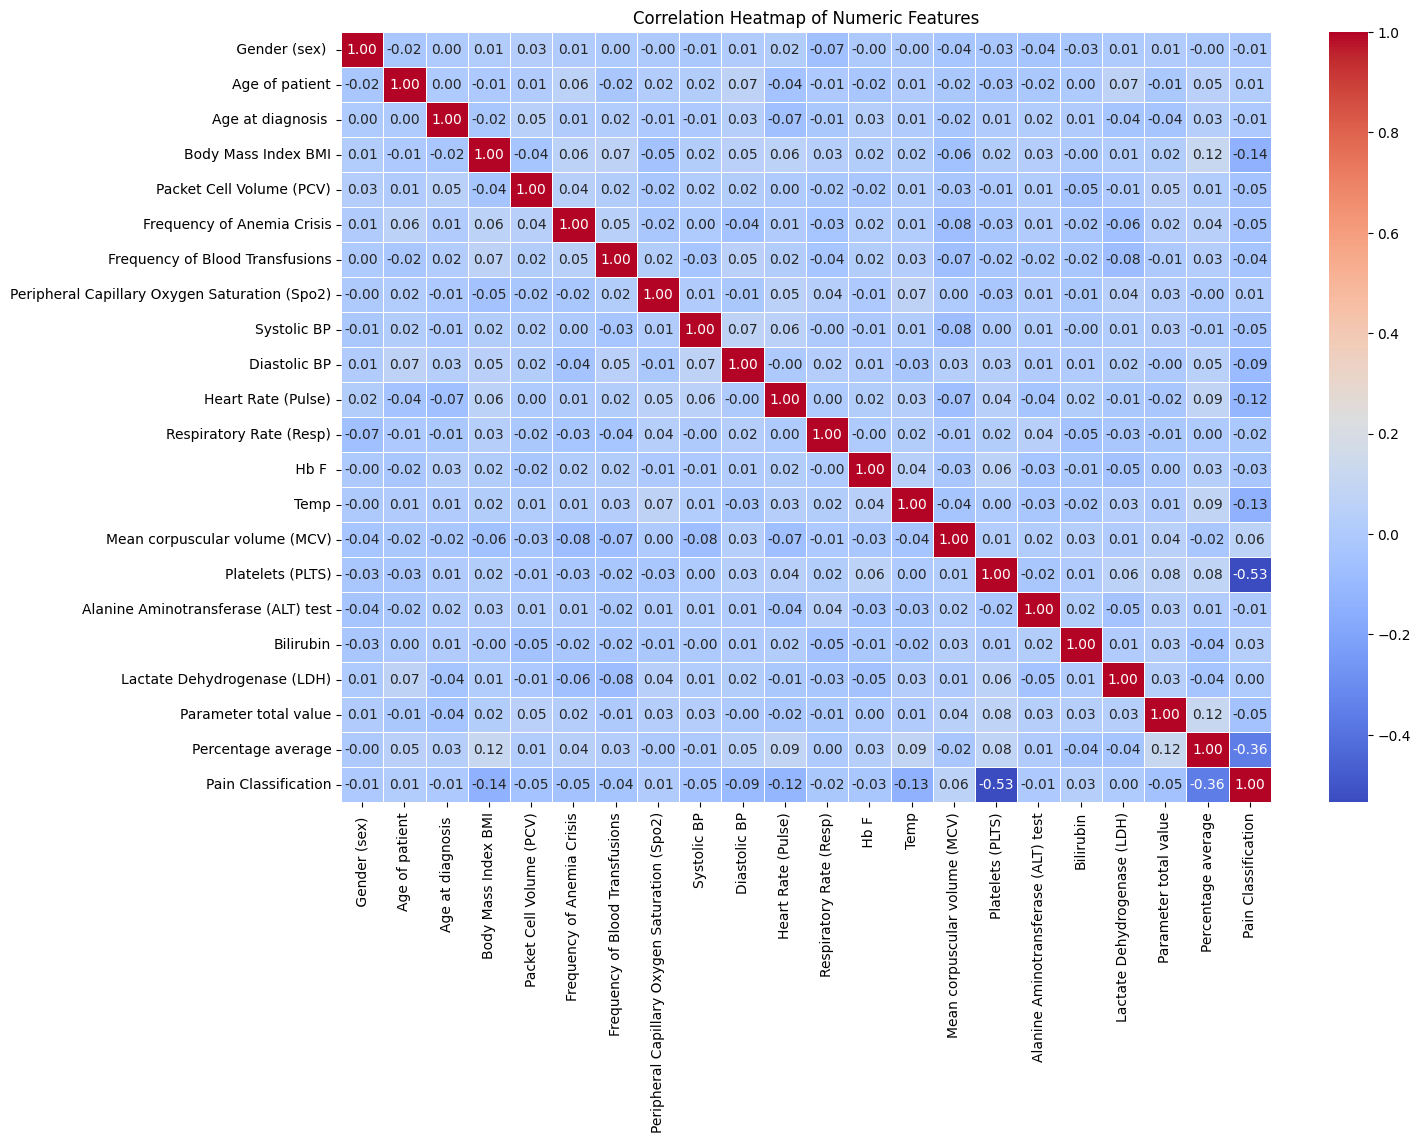

In [61]:
# Select only numeric columns

# Compute the correlation matrix
correlation_matrix = dataframe.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Linear Regression :

In [62]:
# Step 1: Build a regression model using Frequency of Anemia Crisis
X = dataframe['Frequency of Anemia Crisis'].values.reshape(-1, 1)
y = dataframe['Frequency of Blood Transfusions'].values

model = LinearRegression()
model.fit(X, y)

print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')
print(f'RMSE: {mean_squared_error(y, model.predict(X))**0.5}')

# Step 2: Add Peripheral Capillary Oxygen Saturation
X = dataframe[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)']].values
model = LinearRegression()
model.fit(X, y)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')
print(f'RMSE: {mean_squared_error(y, model.predict(X))**0.5}')

# Step 3: Add Packet Cell Volume (PCV)
X = dataframe[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)', 'Packet Cell Volume (PCV)']].values
model = LinearRegression()
model.fit(X, y)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')
print(f'RMSE: {mean_squared_error(y, model.predict(X))**0.5}')

# Step 4: Add Diastolic BP
X = dataframe[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)', 'Packet Cell Volume (PCV)', 'Diastolic BP']].values
model = LinearRegression()
model.fit(X, y)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')
print(f'RMSE: {mean_squared_error(y, model.predict(X))**0.5}')

# Step 5: Add Systolic BP
X = dataframe[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)', 'Packet Cell Volume (PCV)', 'Diastolic BP', 'Systolic BP']].values
model = LinearRegression()
model.fit(X, y)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')
print(f'RMSE: {mean_squared_error(y, model.predict(X))**0.5}')

Coefficient: 0.021348930435712902
Intercept: 2.7544754033794474
R-squared: 0.002182351402631455
RMSE: 1.2089099888017985
Coefficients: [0.02158078 0.00092946]
Intercept: 2.7053368195367806
R-squared: 0.0026495711883638418
RMSE: 1.2086269246562307
Coefficients: [0.02125924 0.00094447 0.00077644]
Intercept: 2.6659815234705406
R-squared: 0.0029626209424944427
RMSE: 1.2084372270106494
Coefficients: [0.02230179 0.00097803 0.0007211  0.00393662]
Intercept: 2.2768400901115373
R-squared: 0.005539844027395491
RMSE: 1.2068743831367248
Coefficients: [ 0.02242916  0.00099468  0.00074688  0.00414907 -0.00189111]
Intercept: 2.523373964998328
R-squared: 0.007055404893545281
RMSE: 1.2059543920282176


**Decision Tree Regressor:** These results indicate that the  model has achieved a perfect fit on the training data, with an R-squared of 1.0 and an RMSE of 0.0. This is a sign of potential overfitting, as the model has likely learned the training data too well and may not generalize well to new
**Random Forest Regressor:**  The model has performed much better, with an R-squared of 0.8482 and an RMSE of 0.4715. This suggests that the model is capturing a significant amount of the variation in the target variable (Frequency of Blood Transfusions) and making reasonably accurate predictions
**Gradient Boosting Regressor:**  The model has the lowest performance among the three, with an R-squared of 0.2416 and an RMSE of 1.0540. This indicates that this model is not as effective at predicting the Frequency of Blood Transfusions as the Random Forest Regressor.

In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target
X = dataframe[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)', 'Packet Cell Volume (PCV)', 'Diastolic BP', 'Systolic BP']]
y = dataframe['Frequency of Blood Transfusions']

print("\nDecision Tree Regressor:")
model_dt = DecisionTreeRegressor()
model_dt.fit(X, y)
dt_train_r2 = model_dt.score(X, y)
dt_train_rmse = mean_squared_error(y, model_dt.predict(X))**0.5
print(f"R-squared: {dt_train_r2:.4f}")
print(f"RMSE: {dt_train_rmse:.4f}")

# Random Forest Regressor
print("\nRandom Forest Regressor:")
model_rf = RandomForestRegressor()
model_rf.fit(X, y)
rf_train_r2 = model_rf.score(X, y)
rf_train_rmse = mean_squared_error(y, model_rf.predict(X))**0.5
print(f"R-squared: {rf_train_r2:.4f}")
print(f"RMSE: {rf_train_rmse:.4f}")

# Gradient Boosting Regressor
print("\nGradient Boosting Regressor:")
model_gb = GradientBoostingRegressor()
model_gb.fit(X, y)
gb_train_r2 = model_gb.score(X, y)
gb_train_rmse = mean_squared_error(y, model_gb.predict(X))**0.5
print(f"R-squared: {gb_train_r2:.4f}")
print(f"RMSE: {gb_train_rmse:.4f}")


Decision Tree Regressor:
R-squared: 1.0000
RMSE: 0.0000

Random Forest Regressor:
R-squared: 0.8519
RMSE: 0.4657

Gradient Boosting Regressor:
R-squared: 0.2416
RMSE: 1.0540


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import shap


def evaluate_and_explain_model(model_name, model):


  # SHAP Explanations
  if isinstance(model, DecisionTreeRegressor):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
  else:
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

In [ ]:
import pandas as pd
import numpy as np
import shap

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target
X = dataframe[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)', 'Packet Cell Volume (PCV)', 'Diastolic BP', 'Systolic BP']]
y = dataframe['Frequency of Blood Transfusions']

# Split data into training and testing sets (recommended for explainability)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_and_explain_model(model_name, model):
    # ... (rest of the function)

    # SHAP Explanations
    if isinstance(model, DecisionTreeRegressor):
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.KernelExplainer(model.predict, X_train)

    shap_values = explainer.shap_values(X_test)

    # Summary plot
    shap.summary_plot(shap_values, X_test)

    # Force plot for a specific instance
    shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


Random Forest Regressor:
R-squared (Training): 0.8561
RMSE (Training): 0.4574


  0%|          | 0/260 [00:00<?, ?it/s]

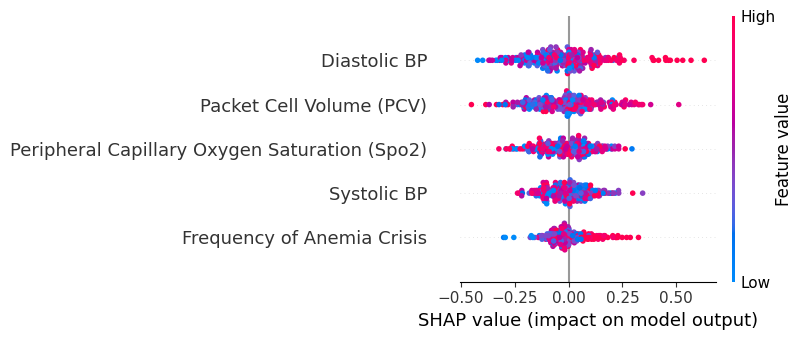

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Import libraries for explainability
import shap
!pip install lime
import lime
from lime.lime_tabular import LimeTabularExplainer

# Define the features and target
X = dataframe[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)', 'Packet Cell Volume (PCV)', 'Diastolic BP', 'Systolic BP']]
y = dataframe['Frequency of Blood Transfusions']

# Split data into training and testing sets (recommended for explainability)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and explain models
def evaluate_and_explain_model(model_name, model):
  """
  Trains a model, evaluates its performance, and generates SHAP and LIME explanations.

  Args:
      model_name (str): Name of the model being evaluated.
      model: The machine learning model to train and explain.
  """
  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the training data
  train_r2 = model.score(X_train, y_train)
  train_rmse = mean_squared_error(y_train, model.predict(X_train))**0.5

  # Print evaluation results
  print(f"\n{model_name}:")
  print(f"R-squared (Training): {train_r2:.4f}")
  print(f"RMSE (Training): {train_rmse:.4f}")

  # SHAP Explanations (consider using X_test for more generalizable insights)
  explainer = shap.KernelExplainer(model.predict, X_train)
  shap_values = explainer.shap_values(X_test)

  # Summary plot
  shap.summary_plot(shap_values, X_test)

  # Force plot for a specific instance (optional)
  # shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

  # LIME Explanations (consider using X_test for more generalizable insights)
  explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Prediction'])
  exp = explainer.explain_instance(X_test.iloc[0], model.predict_proba)
  exp.show_in_notebook(show_table=True)

# Evaluate and Explain Decision Tree Regressor
#evaluate_and_explain_model("Decision Tree Regressor", DecisionTreeRegressor())

# Evaluate and Explain Random Forest Regressor
evaluate_and_explain_model("Random Forest Regressor", RandomForestRegressor())

# Evaluate and Explain Gradient Boosting Regressor
evaluate_and_explain_model("Gradient Boosting Regressor", GradientBoostingRegressor())

In [64]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = dataframe[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)',
               'Packet Cell Volume (PCV)', 'Diastolic BP', 'Systolic BP']]
y = dataframe['Frequency of Blood Transfusions']

# Define parameter grids for tuning
dt_param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
gb_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}

# Perform Grid Search for Decision Tree
print("\nTuning Decision Tree Regressor:")
grid_dt = GridSearchCV(DecisionTreeRegressor(), dt_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_dt.fit(X, y)
print(f"Best Parameters for Decision Tree: {grid_dt.best_params_}")
print(f"Best R-squared for Decision Tree: {grid_dt.best_score_:.4f}")

# Perform Grid Search for Random Forest
print("\nTuning Random Forest Regressor:")
grid_rf = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X, y)
print(f"Best Parameters for Random Forest: {grid_rf.best_params_}")
print(f"Best R-squared for Random Forest: {grid_rf.best_score_:.4f}")

# Perform Grid Search for Gradient Boosting
print("\nTuning Gradient Boosting Regressor:")
grid_gb = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_gb.fit(X, y)
print(f"Best Parameters for Gradient Boosting: {grid_gb.best_params_}")
print(f"Best R-squared for Gradient Boosting: {grid_gb.best_score_:.4f}")

# Splitting data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Testing the best model from Random Forest
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Final evaluation metrics
test_r2 = r2_score(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred)**0.5
print("\nFinal Test Results using Best Random Forest Model:")
print(f"Test R-squared: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")



Tuning Decision Tree Regressor:
Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Best R-squared for Decision Tree: -0.0530

Tuning Random Forest Regressor:
Best Parameters for Random Forest: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300}
Best R-squared for Random Forest: -0.0146

Tuning Gradient Boosting Regressor:
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best R-squared for Gradient Boosting: -0.0116

Final Test Results using Best Random Forest Model:
Test R-squared: -0.0204
Test RMSE: 1.2391


In [65]:
#Trying SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5], 'kernel': ['linear', 'rbf']}
grid_svr = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_svr.fit(X, y)

print(f"Best Parameters for SVR: {grid_svr.best_params_}")
print(f"Best R-squared for SVR: {grid_svr.best_score_:.4f}")



Best Parameters for SVR: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Best R-squared for SVR: -0.0025


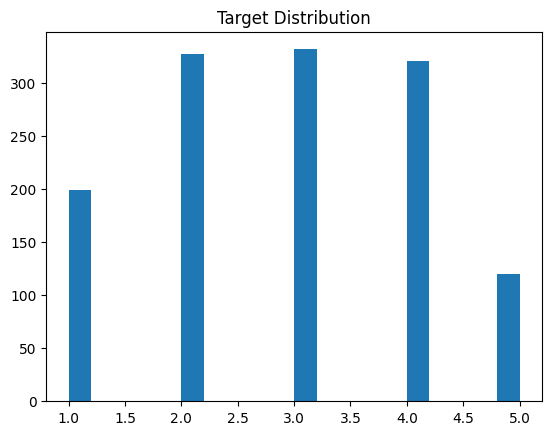

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Check target distribution
plt.hist(y, bins=20)
plt.title("Target Distribution")
plt.show()

# Apply log transformation if skewed
y_transformed = np.log1p(y)  # log(1 + y) to handle zeros



In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target for augmentation
selected_features = [
    'Body Mass Index BMI',
    'Packet Cell Volume (PCV)',
    'Frequency of Anemia Crisis',
    'Peripheral Capillary Oxygen Saturation (Spo2)',
    'Systolic BP',
    'Diastolic BP'
]
X = dataframe[selected_features]
y = dataframe['Frequency of Blood Transfusions']

# Scale features for SMOTE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Display the original and resampled data sizes
print(f"Original data size: {X.shape}")
print(f"Resampled data size: {X_resampled.shape}")

# Reintegrate into a DataFrame
augmented_data = pd.DataFrame(X_resampled, columns=selected_features)
augmented_data['Frequency of Blood Transfusions'] = y_resampled

# Save augmented data for further use
augmented_data.to_csv('augmented_scd_data.csv', index=False)


Original data size: (1300, 6)
Resampled data size: (1660, 6)


In [69]:
# Load the dataset
AugmenteddataFrame = pd.read_csv("augmented_scd_data.csv")

# Display the first few rows
AugmenteddataFrame.head(100)

,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,Diastolic BP,Frequency of Blood Transfusions
0,-1.040653,1.304342,-1.342555,-1.757642,-1.155877,0.596834,3
1,0.702210,-1.484905,1.678339,-0.585462,-0.515365,-0.682869,3
2,-1.169754,0.688534,0.167892,-1.011709,1.005849,0.148938,1
3,0.056705,0.724758,-1.342555,-1.473477,-0.635461,1.556610,2
4,0.185806,-1.267561,-0.209720,0.906404,-0.395269,-1.066780,5
...,...,...,...,...,...,...,...
95,-1.686158,0.507414,1.678339,0.693280,0.725625,-1.578661,5
96,-1.557057,-0.977769,0.545504,0.764322,0.285274,-1.002795,3
97,1.024962,0.797206,-0.209720,-0.230256,0.525466,-0.426928,4
98,0.379457,-1.774697,1.678339,-1.544518,0.325306,-0.362943,2


In [70]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target
X = AugmenteddataFrame[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)', 'Packet Cell Volume (PCV)', 'Diastolic BP', 'Systolic BP','Body Mass Index BMI']]
y = AugmenteddataFrame['Frequency of Blood Transfusions']

print("\nDecision Tree Regressor:")
model_dt = DecisionTreeRegressor()
model_dt.fit(X, y)
dt_train_r2 = model_dt.score(X, y)
dt_train_rmse = mean_squared_error(y, model_dt.predict(X))**0.5
print(f"R-squared: {dt_train_r2:.4f}")
print(f"RMSE: {dt_train_rmse:.4f}")

# Random Forest Regressor
print("\nRandom Forest Regressor:")
model_rf = RandomForestRegressor()
model_rf.fit(X, y)
rf_train_r2 = model_rf.score(X, y)
rf_train_rmse = mean_squared_error(y, model_rf.predict(X))**0.5
print(f"R-squared: {rf_train_r2:.4f}")
print(f"RMSE: {rf_train_rmse:.4f}")

# Gradient Boosting Regressor
print("\nGradient Boosting Regressor:")
model_gb = GradientBoostingRegressor()
model_gb.fit(X, y)
gb_train_r2 = model_gb.score(X, y)
gb_train_rmse = mean_squared_error(y, model_gb.predict(X))**0.5
print(f"R-squared: {gb_train_r2:.4f}")
print(f"RMSE: {gb_train_rmse:.4f}")


Decision Tree Regressor:
R-squared: 1.0000
RMSE: 0.0000

Random Forest Regressor:
R-squared: 0.9064
RMSE: 0.4326

Gradient Boosting Regressor:
R-squared: 0.3224
RMSE: 1.1641


In [71]:
# Decision Tree Regressor with Cross-Validation
print("\nDecision Tree Regressor:")
model_dt = DecisionTreeRegressor()
dt_cv_scores = cross_val_score(model_dt, X, y, cv=5, scoring='r2')  # 5-fold cross-validation
print(f"Cross-validated R-squared: {dt_cv_scores.mean():.4f}")

# Random Forest Regressor with Cross-Validation
print("\nRandom Forest Regressor:")
model_rf = RandomForestRegressor()
rf_cv_scores = cross_val_score(model_rf, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {rf_cv_scores.mean():.4f}")

# Gradient Boosting Regressor with Cross-Validation
print("\nGradient Boosting Regressor:")
model_gb = GradientBoostingRegressor()
gb_cv_scores = cross_val_score(model_gb, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {gb_cv_scores.mean():.4f}")


Decision Tree Regressor:
Cross-validated R-squared: -0.7476

Random Forest Regressor:
Cross-validated R-squared: 0.1680

Gradient Boosting Regressor:
Cross-validated R-squared: -0.0684

Decision Tree Regressor:
Cross-validated R-squared: -0.7396

Random Forest Regressor:


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import shap


def evaluate_and_explain_model(model_name, model):


  # SHAP Explanations
  if isinstance(model, DecisionTreeRegressor):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)
  else:
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

In [74]:
import pandas as pd
import numpy as np
import shap

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target
X = AugmenteddataFrame[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)', 'Packet Cell Volume (PCV)', 'Diastolic BP', 'Systolic BP','Body Mass Index BMI']]
y = AugmenteddataFrame['Frequency of Blood Transfusions']

# Split data into training and testing sets (recommended for explainability)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_and_explain_model(model_name, model):
    # ... (rest of the function)

    # SHAP Explanations
    if isinstance(model, DecisionTreeRegressor):
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.KernelExplainer(model.predict, X_train)

    shap_values = explainer.shap_values(X_test)

    # Summary plot
    shap.summary_plot(shap_values, X_test)

    # Force plot for a specific instance
    shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d5a488107580e1736dcc870bedc4912ca21e65885fa9ee0d2282d9cb795cea12
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime



Random Forest Regressor:
R-squared (Training): 0.9014
RMSE (Training): 0.4440


  0%|          | 0/332 [00:00<?, ?it/s]

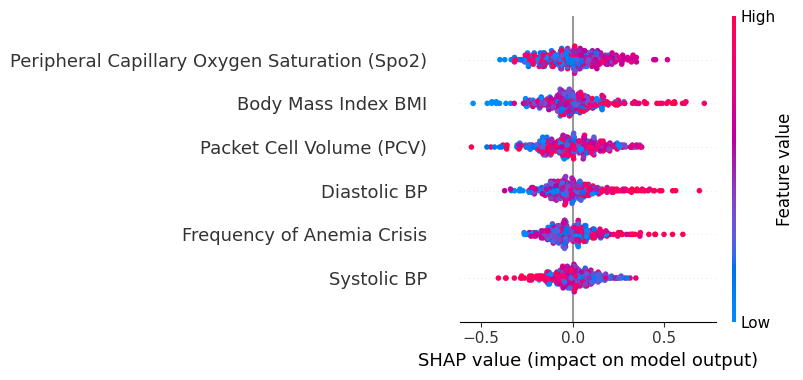

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Import libraries for explainability
import shap
!pip install lime
import lime
from lime.lime_tabular import LimeTabularExplainer

# Define the features and target
X = AugmenteddataFrame[['Frequency of Anemia Crisis', 'Peripheral Capillary Oxygen Saturation (Spo2)', 'Packet Cell Volume (PCV)', 'Diastolic BP', 'Systolic BP','Body Mass Index BMI']]
y = AugmenteddataFrame['Frequency of Blood Transfusions']

# Split data into training and testing sets (recommended for explainability)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and explain models
def evaluate_and_explain_model(model_name, model):
  """
  Trains a model, evaluates its performance, and generates SHAP and LIME explanations.

  Args:
      model_name (str): Name of the model being evaluated.
      model: The machine learning model to train and explain.
  """
  # Train the model
  model.fit(X_train, y_train)

  # Evaluate the model on the training data
  train_r2 = model.score(X_train, y_train)
  train_rmse = mean_squared_error(y_train, model.predict(X_train))**0.5

  # Print evaluation results
  print(f"\n{model_name}:")
  print(f"R-squared (Training): {train_r2:.4f}")
  print(f"RMSE (Training): {train_rmse:.4f}")

  # SHAP Explanations (consider using X_test for more generalizable insights)
  explainer = shap.KernelExplainer(model.predict, X_train)
  shap_values = explainer.shap_values(X_test)

  # Summary plot
  shap.summary_plot(shap_values, X_test)

  # Force plot for a specific instance (optional)
  # shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

  # LIME Explanations (consider using X_test for more generalizable insights)
  explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Prediction'])
  exp = explainer.explain_instance(X_test.iloc[0], model.predict_proba)
  exp.show_in_notebook(show_table=True)

# Evaluate and Explain Decision Tree Regressor
#evaluate_and_explain_model("Decision Tree Regressor", DecisionTreeRegressor())

# Evaluate and Explain Random Forest Regressor
evaluate_and_explain_model("Random Forest Regressor", RandomForestRegressor())

# Evaluate and Explain Gradient Boosting Regressor
evaluate_and_explain_model("Gradient Boosting Regressor", GradientBoostingRegressor())